# Examining Factors Responsible for Heart Attacks

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [3]:
 data = pd.read_excel('data.xlsx')

# Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.

1. Perform preliminary data inspection and report the findings as to the structure of the data, missing values, duplicates, etc.
2. Based on the findings from the previous question remove duplicates (if any) , treat missing values using an appropriate strategy.

In [4]:
#Understanding Data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.shape

(303, 14)

In [8]:
 data.duplicated().sum()

1

In [9]:
#We can remove the Duplicates

data.drop_duplicates(inplace = True)
data.reset_index(drop = True, inplace = True)

In [10]:
data.size

4228

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [13]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Based on data description :


sex -> sex male = 1 female = 0 

cp -> chest pain type 

fbs -> fasting blood sugar 0 = lower than 120 mg/dl 1 = greater than 120 mg/dl 

exang -> exercise induced angina 0 = No 1 = Yes 

slope-> 0 = upsloping 1 = flat 2 = downsloping 

thal -> thalessimia 1 = normal 2 = fixed defect 3 =reversible defect

In [14]:
data.rename({'cp' :'chest_pain_type',
'trestbps':'resting_blood_pressure',
'chol':'cholesterol',
'fbs' :'fasting_blood_sugar',
'restecg':'resting_ecg',
'thalach' : 'max_heart_rate',
'exang':'exercise_induced_angina',
'oldpeak':'st_depression',
'slope':'st_slope',
'ca' : 'major_vessels',
'thal' :'thalessimia' },axis = 1, inplace = True)

In [15]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels',
       'thalessimia', 'target'],
      dtype='object')

In [16]:
df2 = data.copy()

In [17]:
data['target'].value_counts() 

1    164
0    138
Name: target, dtype: int64

# 2.Based on the findings from the previous question, remove duplicates (if any) and treat missing values using an appropriate strategy.


In [18]:
X= data.drop(columns='target', axis=1)
Y = data['target']

# 3. Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

In [19]:
print(X)

     age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0     63    1                3                     145          233   
1     37    1                2                     130          250   
2     41    0                1                     130          204   
3     56    1                1                     120          236   
4     57    0                0                     120          354   
..   ...  ...              ...                     ...          ...   
297   57    0                0                     140          241   
298   45    1                3                     110          264   
299   68    1                0                     144          193   
300   57    1                0                     130          131   
301   57    0                1                     130          236   

     fasting_blood_sugar  resting_ecg  max_heart_rate  \
0                      1            0             150   
1                      0         

In [20]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
297    0
298    0
299    0
300    0
301    0
Name: target, Length: 302, dtype: int64


In [21]:
data.shape

(302, 14)

# Performing EDA:

# 4.Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools. For example: count plot.

In [22]:
target_counts = data.target.value_counts()

In [23]:
print('Class 0:', target_counts[0])
print('Class 1:', target_counts[1])
print('Proportion:', round(target_counts[0] / target_counts[1], 2), ': 1')

Class 0: 138
Class 1: 164
Proportion: 0.84 : 1


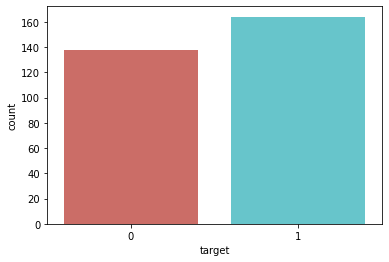

In [24]:
sns.countplot(x='target', data = data, palette = 'hls')
plt.show()

In [25]:
print(data.apply(lambda col: col.unique()))

age                        [63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 5...
sex                                                                   [1, 0]
chest_pain_type                                                 [3, 2, 1, 0]
resting_blood_pressure     [145, 130, 120, 140, 172, 150, 110, 135, 160, ...
cholesterol                [233, 250, 204, 236, 354, 192, 294, 263, 199, ...
fasting_blood_sugar                                                   [1, 0]
resting_ecg                                                        [0, 1, 2]
max_heart_rate             [150, 187, 172, 178, 163, 148, 153, 173, 162, ...
exercise_induced_angina                                               [0, 1]
st_depression              [2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, ...
st_slope                                                           [0, 2, 1]
major_vessels                                                [0, 2, 1, 3, 4]
thalessimia                                                     [1, 2, 3, 0]

In [26]:
data.groupby('target').mean()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


<AxesSubplot:>

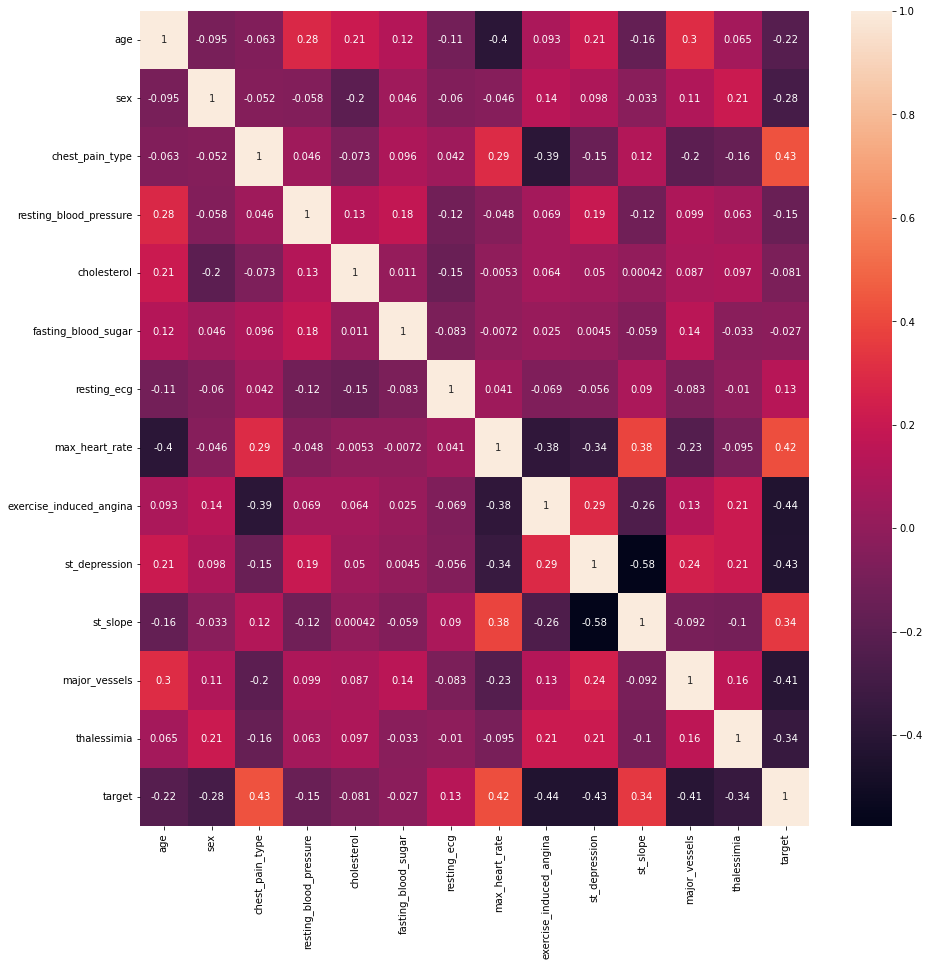

In [27]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,ax=ax)

<AxesSubplot:xlabel='age', ylabel='Density'>

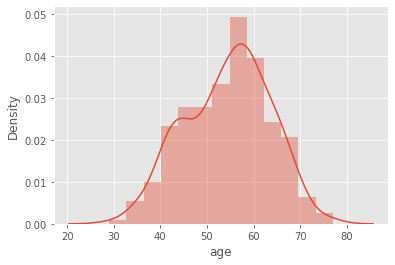

In [30]:
sns.distplot(data.age)

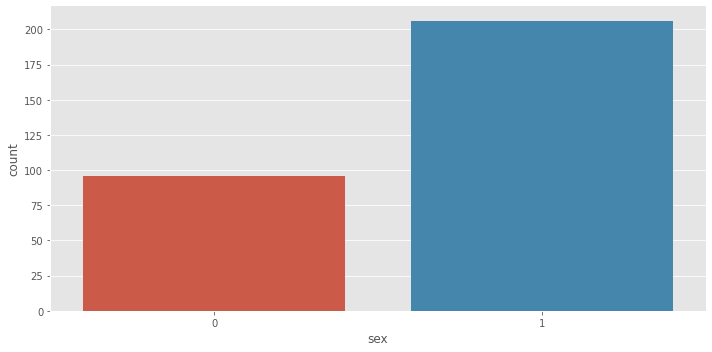

In [31]:
sns.factorplot('sex', data = data, kind = 'count', aspect = 2.0)

# There are significantly more men in the data than women
5.Study the occurrence of CVD across different ages.

6. Can we detect heart attack based on anomalies in resting blood pressure of the patient?

A box plot to show the ranges of ages of the women and men in the data

<AxesSubplot:xlabel='sex', ylabel='age'>

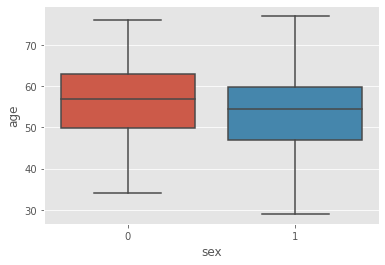

In [33]:
sns.boxplot(data = data, x = 'sex', y = 'age')

In [34]:
hist_df = data.groupby('target')

In [35]:
 hist_df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
164,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
165,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
166,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
167,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
168,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [36]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Project Task: Week 2. 1.Describe the relationship between cholesterol levels and our target variable.

# Combining the Age with Target columns,

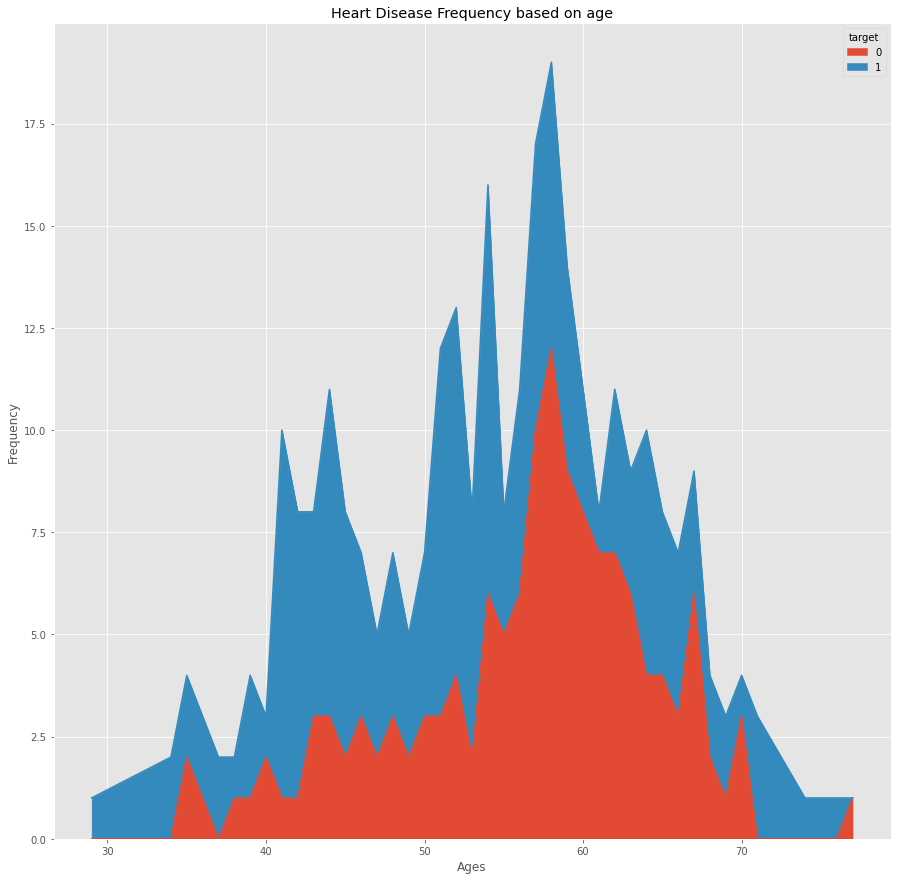

In [37]:
pd.crosstab(data.age, data.target).plot(kind= "area", figsize=(15, 15))
plt.title('Heart Disease Frequency based on age')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

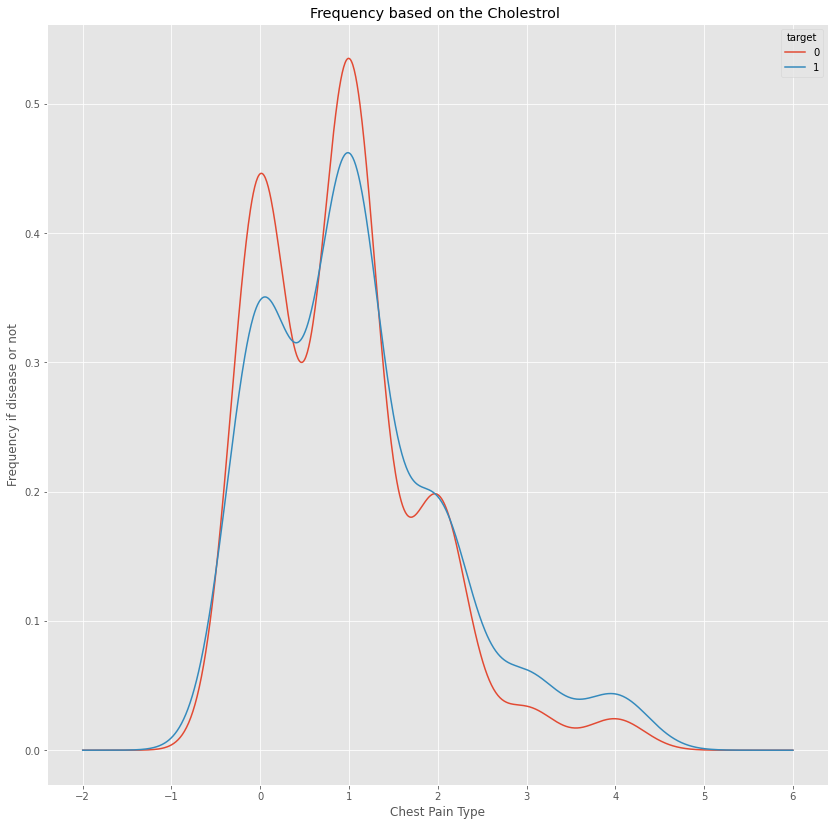

In [38]:
pd.crosstab(data.cholesterol, data.target).plot(kind= "kde", figsize= (14, 14))
plt.title('Frequency based on the Cholestrol ')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency if disease or not')
plt.show()

# A distribution of the ages of patients that suffered a heart attack.

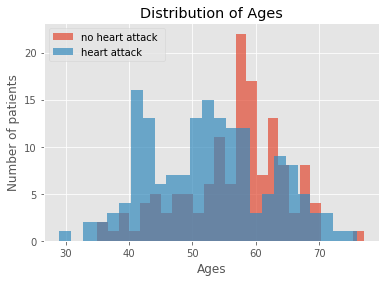

In [39]:
hist_df['age'].hist(bins=25, alpha=0.7)
plt.title('Distribution of Ages')
plt.xlabel('Ages')
plt.ylabel('Number of patients')
plt.legend(('no heart attack ', 'heart attack'), loc = 'upper left')
plt.show()


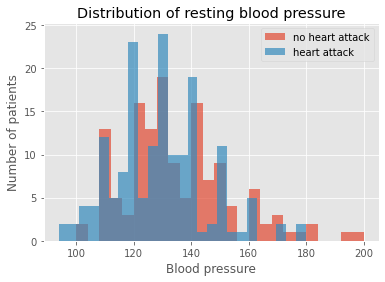

In [40]:
hist_df['resting_blood_pressure'].hist(bins=25, alpha=0.7)
plt.title('Distribution of resting blood pressure')
plt.xlabel('Blood pressure')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()


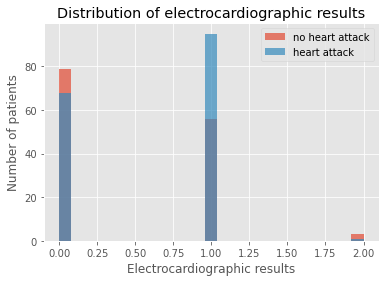

In [41]:
hist_df['resting_ecg'].hist(bins = 25, alpha = 0.7)
plt.title('Distribution of electrocardiographic results')
plt.xlabel('Electrocardiographic results')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

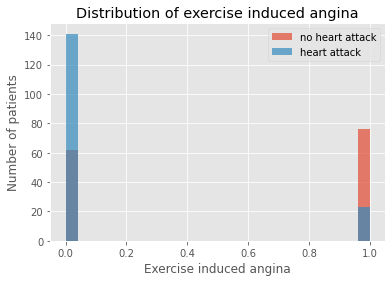

In [42]:
hist_df['exercise_induced_angina'].hist(bins = 25, alpha = 0.7)
plt.title('Distribution of exercise induced angina')
plt.xlabel('Exercise induced angina')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

# 2.What can be concluded about the relationship between peak exercising and occurrence of heart attack?

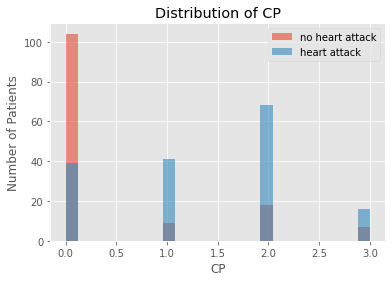

In [43]:
hist_df['chest_pain_type'].hist(bins = 25, alpha=0.6)
plt.title('Distribution of CP')
plt.xlabel('CP')
plt.ylabel('Number of Patients')
plt.legend(('no heart attack', 'heart attack'))
plt.show()

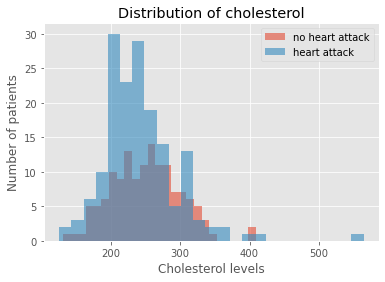

In [44]:
hist_df['cholesterol'].hist(bins = 25, alpha=0.6)
plt.title('Distribution of cholesterol')
plt.xlabel('Cholesterol levels')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

In [45]:
def get_gender(sex_value):
    
    gender_string = 'Male'
    
    if sex_value == 0:
        gender_string = 'Female'
    return gender_string

def get_cp_category(cp_value):
    
    if cp_value == 0:
        cp_string = 'typical'
    elif cp_value == 1:
        cp_string = 'atypical'
    elif cp_value == 2:
        cp_string = 'non_anginal'
    elif cp_value == 3:
        cp_string = 'asmptomatic'
    
    return(cp_string)

In [46]:
subset_df = data[['sex', 'chest_pain_type']]

In [47]:
subset_df = data[['sex', 'chest_pain_type']]
subset_df.head()

,sex,chest_pain_type
0,1,3
1,1,2
2,0,1
3,1,1
4,0,0


# 3.Is thalassemia a major cause of CVD? How are the other factors determining the occurrence of CVD?

In [48]:
subset_df['sex'] = subset_df.sex.map(lambda x: get_gender(x))
subset_df['chest_pain_type'] = subset_df.chest_pain_type.map(lambda x: get_cp_category(x))

In [49]:
subset_df.head()

,sex,chest_pain_type
0,Male,asmptomatic
1,Male,non_anginal
2,Female,atypical
3,Male,atypical
4,Female,typical


In [50]:
dum_df = pd.get_dummies(subset_df[['sex', 'chest_pain_type']])

In [51]:
dum_df.head()

,sex_Female,sex_Male,chest_pain_type_asmptomatic,chest_pain_type_atypical,chest_pain_type_non_anginal,chest_pain_type_typical
0,0,1,1,0,0,0
1,0,1,0,0,1,0
2,1,0,0,1,0,0
3,0,1,0,1,0,0
4,1,0,0,0,0,1


In [52]:
dum_df.head()

,sex_Female,sex_Male,chest_pain_type_asmptomatic,chest_pain_type_atypical,chest_pain_type_non_anginal,chest_pain_type_typical
0,0,1,1,0,0,0
1,0,1,0,0,1,0
2,1,0,0,1,0,0
3,0,1,0,1,0,0
4,1,0,0,0,0,1


In [53]:
dum_df = dum_df.drop(['sex_Female'], axis = 1)

In [54]:
dum_df.rename(columns = {'sex_Male': 'Male'}, inplace = True)

In [55]:
df = pd.concat([data, dum_df], axis = 1)

In [56]:
df = pd.concat([data, dum_df], axis = 1)
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target,Male,chest_pain_type_asmptomatic,chest_pain_type_atypical,chest_pain_type_non_anginal,chest_pain_type_typical
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,0,0,1


In [57]:
df = df.drop(['sex', 'chest_pain_type'], axis = 1)

In [58]:
df.columns

Index(['age', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar',
       'resting_ecg', 'max_heart_rate', 'exercise_induced_angina',
       'st_depression', 'st_slope', 'major_vessels', 'thalessimia', 'target',
       'Male', 'chest_pain_type_asmptomatic', 'chest_pain_type_atypical',
       'chest_pain_type_non_anginal', 'chest_pain_type_typical'],
      dtype='object')

# Model building in Scikit-learn. Loading Data

In [59]:
df = df[['age', 'Male', 'chest_pain_type_asmptomatic','chest_pain_type_typical', 'chest_pain_type_non_anginal', 'chest_pain_type_atypical', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina',
       'st_depression', 'st_slope', 'major_vessels', 'thalessimia', 'target']]

In [60]:
df.columns

Index(['age', 'Male', 'chest_pain_type_asmptomatic', 'chest_pain_type_typical',
       'chest_pain_type_non_anginal', 'chest_pain_type_atypical',
       'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar',
       'resting_ecg', 'max_heart_rate', 'exercise_induced_angina',
       'st_depression', 'st_slope', 'major_vessels', 'thalessimia', 'target'],
      dtype='object')

In [61]:
print(data.age.min())
print(data.age.max())
data[data['age'] < 30]

29
77


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


# 4.Use a pair plot to understand the relationship between all the given variables.

In [ ]:
#sns.pairplot(df)

In [62]:
X = df.iloc[:, :-1].values

In [63]:
X

array([[63.,  1.,  1., ...,  0.,  0.,  1.],
       [37.,  1.,  0., ...,  0.,  0.,  2.],
       [41.,  0.,  0., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  0., ...,  1.,  1.,  2.]])

In [64]:
Y = df.iloc[:, 16].values

In [65]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# 5.Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.

# Splitting the Data into training data and test Data. Logistic Regression

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [67]:
print(X.shape, X_train.shape, X_test.shape)

(302, 16) (211, 16) (91, 16)


# Training the LogisticRegression model with Training data. Model Development and Prediction

In [68]:
logistic_model = LogisticRegression()

In [69]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [70]:
logistic_predictions = logistic_model.predict(X_test)

In [71]:
y_pred = logistic_model.predict(X_test)

# Model Evaluation using Confusion Matrix

In [77]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[31, 12],
       [ 6, 42]], dtype=int64)

In [82]:
print(metrics.confusion_matrix(y_test, logistic_predictions))
print('\n')


[[31 12]
 [ 6 42]]




Text(0.5, 257.44, 'Predicted label')

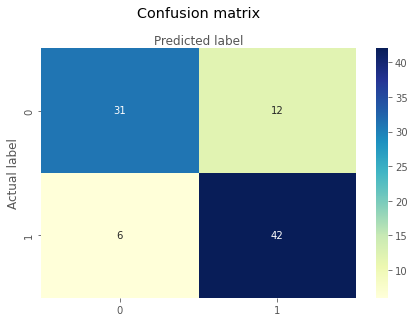

In [80]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix, annot = True,cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [81]:
print("Accuracy:",metrics.accuracy_score(y_test, logistic_predictions))
print("Precision:",metrics.precision_score(y_test, logistic_predictions))
print("Recall:",metrics.recall_score(y_test, logistic_predictions))

Accuracy: 0.8021978021978022
Precision: 0.7777777777777778
Recall: 0.875


# There is no overfitting, The prediction model is good

In [83]:
data.to_excel('Output.xlsx')

In [ ]:
Output is the excel name uploaded in Tableau
Tableau Public Link: 